<h1>Содержание<span class="tocSkip"></span></h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#1.-Импорт-библиотек">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>
                    Импорт библиотек
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#2.-Подготовка-данных">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>
                    Подготовка данных
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#3.-Оптимизация-тестовых-функций">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>
                    Оптимизация тестовых функций
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#3.1.-Функция-Изома">
                            <span class="toc-item-num">3.1.&nbsp;&nbsp;</span>
                            Функция Изома
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#3.2.-Функция-Растригина">
                            <span class="toc-item-num">3.2.&nbsp;&nbsp;</span>
                            Функция Растригина
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#4.-Оптимизация-алгоритмической-проблемы">
                    <span class="toc-item-num">4.&nbsp;&nbsp;</span>
                    Оптимизация алгоритмической проблемы
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#5.-Общий-вывод">
                    <span class="toc-item-num">5.&nbsp;&nbsp;</span>
                    Общий вывод
                </a>
            </span>
        </li>
    </ul>
</div>

# Лабораторная работа №2: Pygmo

**Задача 1:** найти оптимумы тестовых функций для оптимизации с помощью двух алгоритмов библиотеки `pygmo`.

**Задача 2:** сконструировать нефункциональную (алгоритмическую) проблему оптимизации и решить с помощью `pygmo`. 

**Источники данных:** сгенерированный набор точек.

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 1. Импорт библиотек

Установка необходимых библиотек:

In [1]:
# !pip install pygmo

Импорт всех необходимых библиотек:

In [2]:
import pygmo as pg
import numpy as np

from typing import Mapping, Tuple

from utils.plot_charts import *

Внутрипроектный модуль `plot_charts` включает в себя следующие функциии, необходимые для выполнения задач:

* `plot_function_min_search_2d` - построение двумерного графика заданной функции с поиском минимума

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 2. Подготовка данных

Задание множества точек:

In [3]:
x_linear = np.linspace(-5, 5, 1000)
y_linear = np.linspace(-5, 5, 1000)

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 3. Оптимизация тестовых функций

В качестве алгоритмов оптимизации градиентного спуска будут использованы следующие методы библиотеки `pygmo`:

* Self-adaptive Differential Evolution (sade)
* Grey Wolf Optimizer (gwo)

Задание функции, вычисляющей минимум функции:

In [4]:
def get_problem_pop(loss_f: Mapping,
                    gens: int = 1000,
                    pops: int = 100) -> Tuple:
    
    """Get search params and best param
    
       Args:
           loss_f (Mapping): loss function
           gens (int, optional): number of gens. Defaults to 1000
           pops (int, optional): number of pops. Defaults to 100
        
       Return:
           Tuple: x and f values, best x and prob
    """
    
    class Function:
        def fitness(self, x):
            try:
                return [loss_f(x[0], x[0])]
            except:
                return [loss_f(x)]

        def get_bounds(self):
            return ([-5], [5])
    
    prob = pg.problem(Function())
    pop = pg.population(prob, pops)
    
    return pop.get_x()[:, 0], pop.get_f()[:, 0], pop.champion_x, prob

Задание функции, оптимизирующей глобальный минимум функции:

In [5]:
def get_algo_pop(prob: Mapping,
                 algo_f: Mapping,
                 gens: int = 1000,
                 pops: int = 100):
    
    """Get search params and best param
    
       Args:
           loss_f (Mapping): loss function
           algo_f (Mapping): algorithm function
           gens (int, optional): number of gens. Defaults to 1000
           pops (int, optional): number of pops. Defaults to 100
        
       Return:
           Tuple: x and f values, best x
    """
    
    algo = pg.algorithm(algo_f(gen=gens))
    algo.set_verbosity(pops)
    
    pop = pg.population(prob, pops)
    pop = algo.evolve(pop)
    
    return pop.get_x()[:, 0], pop.get_f()[:, 0], pop.champion_x

<div style="height: 2px; background-color: blue; opacity: 0.2; margin: 10px 0;"></div>

### 3.1. Функция Изома

Задание функции:

In [6]:
def izom_loss(x, y):
    return -np.cos(x) * np.cos(x) * np.exp(-((x - np.pi) ** 2 + (y - np.pi) ** 2))

Сохранение результатов поиска минимума:

In [7]:
get_x, get_f, champion_x, prob = get_problem_pop(izom_loss)

Выведение на экран результатов поиска минимума:

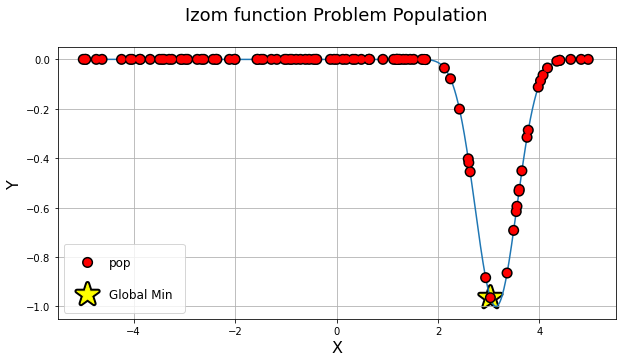

In [8]:
plot_function_min_search_2d(x_linear, y_linear, izom_loss,
                            [get_x, get_f],
                            'Izom function Problem Population',
                            x_min=champion_x)

**Self-adaptive Differential Evolution**

Сохранение результатов оптимизации глобального минимума:

In [9]:
get_x, get_f, champion_x = get_algo_pop(prob, pg.sade)

Выведение на экра результатов оптимизации глобального минимума:

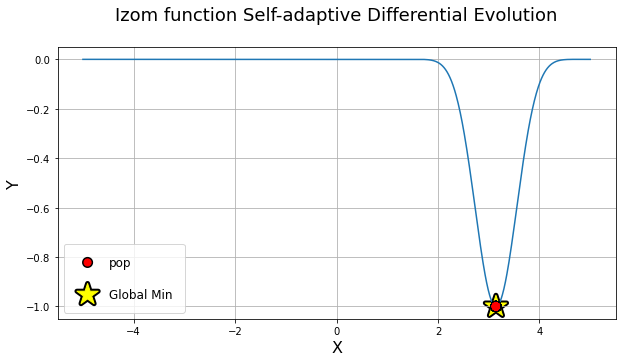

In [10]:
plot_function_min_search_2d(x_linear, y_linear, izom_loss,
                            [get_x, get_f],
                            'Izom function Self-adaptive Differential Evolution',
                            champion_x)

**Grey Wolf Optimizer (gwo)**

Сохранение результатов оптимизации глобального минимума:

In [11]:
get_x, get_f, champion_x = get_algo_pop(prob, pg.gwo)

Выведение на экра результатов оптимизации глобального минимума:

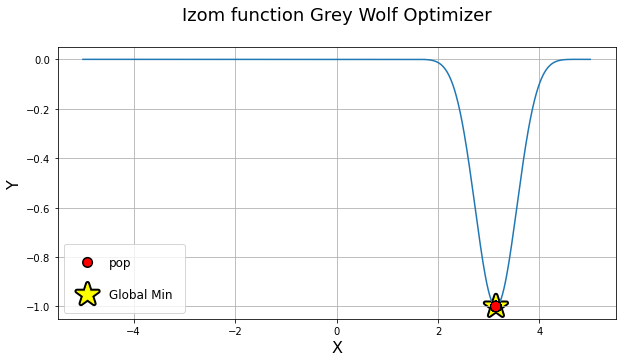

In [12]:
plot_function_min_search_2d(x_linear, y_linear, izom_loss,
                            [get_x, get_f],
                            'Izom function Grey Wolf Optimizer',
                            champion_x)

>**Вывод**
>
>Оба метода достигли глобального минимума.

<div style="height: 2px; background-color: blue; opacity: 0.2; margin: 10px 0;"></div>

### 3.2. Функция Растригина

Задание функции:

In [13]:
def rastrigin_loss(*X, A=10):
    return A + sum([(x ** 2 - A * np.cos(2 * np.pi * x)) for x in X])

Сохранение результатов поиска минимума:

In [14]:
get_x, get_f, champion_x, prob = get_problem_pop(rastrigin_loss)

Выведение на экран результатов поиска минимума:

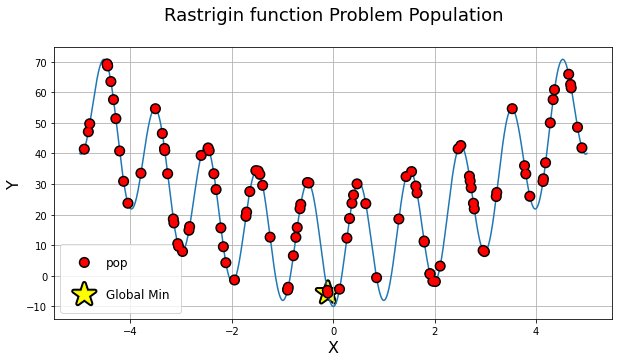

In [15]:
plot_function_min_search_2d(x_linear, y_linear, rastrigin_loss,
                            [get_x, get_f],
                            'Rastrigin function Problem Population',
                            x_min=champion_x)

**Self-adaptive Differential Evolution**

Сохранение результатов оптимизации глобального минимума:

In [16]:
get_x, get_f, champion_x = get_algo_pop(prob, pg.sade)

Выведение на экра результатов оптимизации глобального минимума:

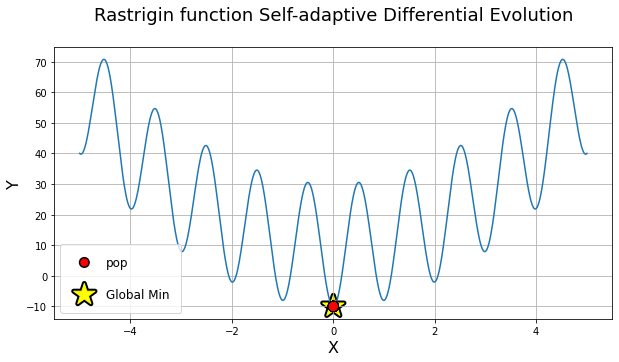

In [17]:
plot_function_min_search_2d(x_linear, y_linear, rastrigin_loss,
                            [get_x, get_f],
                            'Rastrigin function Self-adaptive Differential Evolution',
                            champion_x)

**Grey Wolf Optimizer (gwo)**

Сохранение результатов оптимизации глобального минимума:

In [18]:
get_x, get_f, champion_x = get_algo_pop(prob, pg.gwo)

Выведение на экра результатов оптимизации глобального минимума:

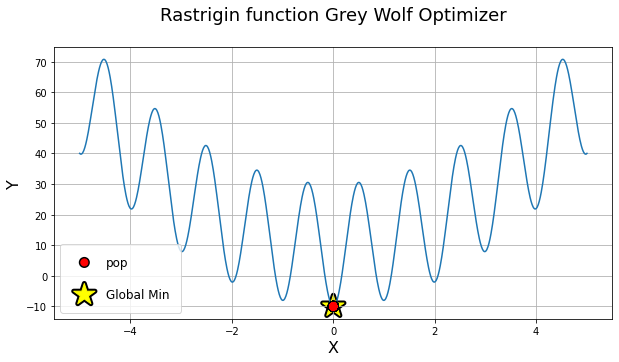

In [19]:
plot_function_min_search_2d(x_linear, y_linear, rastrigin_loss,
                            [get_x, get_f],
                            'Rastrigin function Grey Wolf Optimizer',
                            champion_x)

>**Вывод**
>
>Оба метода достигли глобального минимума.

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 4. Оптимизация алгоритмической проблемы

<div style="height: 2px; background-color: blue; margin: 10px 0;"></div>

## 5. Общий вывод

<div style="text-align: center; font-size: 20px; padding: 15px 0;">
    <a href="#Содержание" data-toc-modified-id="Содержание" style="text-decoration: none; color: #296eaa; border: 2px dashed #296eaa; opacity: 0.8; border-radius: 3px; padding: 10px 80px;">
        Наверх к содержанию ↑
    </a>
</div>